### Import Packages

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import cv2
import random
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Resizing the images

In [36]:
path = "myData"
batch_size_val = 9   
steps_per_epoch_val = 400
epochs_val = 50
imageDimesions = (32, 32, 3)
testRatio = 0.2   
validationRatio = 0.2 

### Importing Images

In [37]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


### Spliting the data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

### To check if number of images matches to number of labels for each dataset

In [39]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


### Read CSV File

In [40]:
# READ CSV FILE
labelFile = "labels.csv"
data = pd.read_csv(labelFile)
print("data shape ", data.shape, type(data))

data shape  (50, 2) <class 'pandas.core.frame.DataFrame'>


### Display some sample images of all the classes

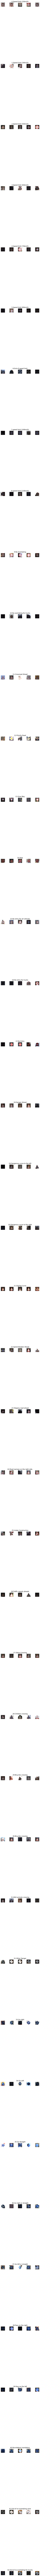

In [41]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        if len(x_selected) > 0:
            random_index = random.randint(0, len(x_selected) - 1)
            axs[j][i].imshow(x_selected[random_index, :, :], cmap=plt.get_cmap("gray"))

            axs[j][i].axis("off")
            if i == 2:
                axs[j][i].set_title(str(j)+ "-"+row["Name"])
                num_of_samples.append(len(x_selected))
        else:
            axs[j % num_classes][i].axis("off")

### Display a bar chart showing number of samples for each category

[117, 1258, 1263, 805, 1136, 1032, 225, 874, 812, 828, 1149, 720, 1243, 1242, 447, 356, 225, 639, 700, 106, 204, 174, 204, 268, 155, 891, 335, 133, 329, 153, 251, 438, 133, 379, 237, 693, 205, 107, 1187, 164, 195, 122, 137]


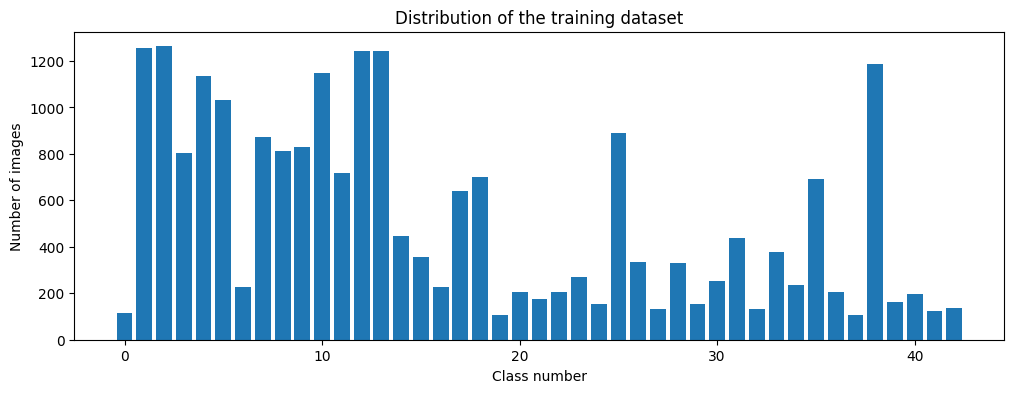

In [42]:
print(num_of_samples)
# num_classes = len(noOfClasses)
plt.figure(figsize=(12, 4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 

### Preprocessing the images

In [43]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255           
    return img
 
X_train=np.array(list(map(preprocessing,X_train))) 
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)]) 
 

### Add a depth of 1

In [44]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

### Augmentation of images 

In [45]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  
X_batch,y_batch = next(batches)

### To show augumeted image samples 

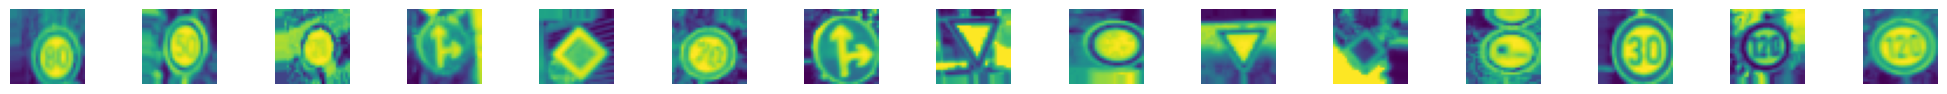

In [46]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = tf.keras.utils.to_categorical(y_train,noOfClasses)
y_validation = tf.keras.utils.to_categorical(y_validation,noOfClasses)
y_test = tf.keras.utils.to_categorical(y_test,noOfClasses)

### CNN Model

In [47]:
def myModel():
    model = tf.keras.Sequential()

    # Convolutional layers
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(imageDimesions[0], imageDimesions[1], 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.5))

    # Fully connected layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(noOfClasses, activation='softmax'))

    # Compile Model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Train the model

In [48]:
model = myModel()
history = model.fit(
    dataGen.flow(X_train, y_train, batch_size=batch_size_val),
    steps_per_epoch=len(X_train) // batch_size_val,
    epochs=epochs_val,
    validation_data=(X_validation, y_validation),
    shuffle=True
)



Epoch 1/50


C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2474/2474 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.0617 - loss: 3.5258 - val_accuracy: 0.3306 - val_loss: 2.6458
Epoch 2/50
   1/2474 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.3333 - loss: 3.4019

C:\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2474/2474 ━━━━━━━━━━━━━━━━━━━━ 1s 567us/step - accuracy: 0.3333 - loss: 3.4019 - val_accuracy: 0.3315 - val_loss: 2.6414
Epoch 3/50
2474/2474 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.2942 - loss: 2.6230 - val_accuracy: 0.5742 - val_loss: 1.5183
Epoch 4/50
2474/2474 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - accuracy: 0.2222 - loss: 2.6510 - val_accuracy: 0.5711 - val_loss: 1.5252
Epoch 5/50
2474/2474 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.4361 - loss: 1.9041 - val_accuracy: 0.6794 - val_loss: 1.1417
Epoch 6/50
2474/2474 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.6667 - loss: 1.4127 - val_accuracy: 0.6796 - val_loss: 1.1445
Epoch 7/50
2474/2474 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.5135 - loss: 1.5904 - val_accuracy: 0.6979 - val_loss: 0.9537
Epoch 8/50
2474/2474 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.6667 - loss: 1.4973 - val_accuracy: 0.6945 - val_loss: 0.9573
Epoch 9/50
2474/2474 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.5821 - loss: 1.36

### Visualization

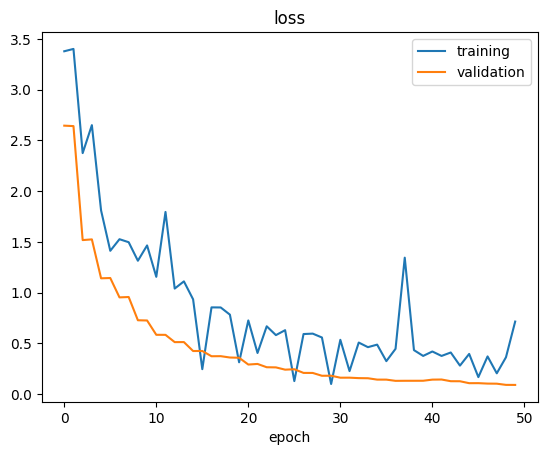

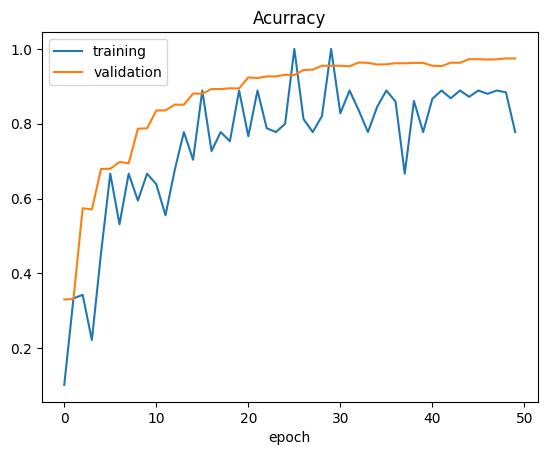

In [49]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()

### Evaluate the model

In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', score[1])

Test Accuracy: 0.972988486289978


In [51]:
model.save("model_trained.h5")
